<font size="+8"><b> <center><u>Blockchain/Cryptocurrency Job Market Analysis</u></center></b></font>

<center><font size="+1">An in-depth analysis of the blockchain and cryptocurrency job market, highlighting key trends, skill rankings, and salary insights. The project provides valuable recommendations for both job seekers and employers based on the findings.</font></center>

<a id="1"></a>
<font size=+3><b>1. Installation</b></font>

To run this project, you'll need to install the following libraries.

In [ ]:
pip install pandas nltk

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

## 1.1 Importing necessary libraries for data analysis, natural language processing, and visualization.


In [1]:
import os
import ast
import nltk
import spacy
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tqdm import tqdm
from spacy.matcher import PhraseMatcher
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<a id="2"></a>
<font size=+3><b>2. Data Preprocessing</b></font>

## 2.1 Text Preprocessing
A function is defined to preprocess text data, including converting to lowercase, tokenization, removing stopwords, and optional stemming.


In [4]:
# Function to preprocess text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming (optional)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

## 2.2 Data Loading and Cleaning
- The script iterates through each CSV file in the specified directory, reads it into a dataframe, and performs the following steps:
  - Drops duplicates based on 'Job Title' and 'Tags.'
  - Removes irrelevant postings by dropping entries where 'Job Title' or 'Tags' are empty.
  - Tokenizes and preprocesses job titles and descriptions using the defined text preprocessing function.
- The cleaned dataframes are appended to a list and then concatenated into a single dataframe.
- Unnecessary columns ('Posted Before,' 'Job Link,' 'Job Location') are dropped, and rows with any missing values are removed.

In [5]:
# Path to your dataset files
data_path = "/kaggle/input/the-evolving-blockchain-cryptocurrency-job-marke"

# List to store dataframes for each file
dataframes = []

# Iterate through each file in the directory
for filename in os.listdir(data_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_path, filename)
        
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        
        
        # Check if required columns exist
        if 'Job Title' not in df.columns or 'Tags' not in df.columns:
            print(f"Skipping {filename} due to missing columns.")
            continue
        
        # Drop duplicates based on 'Job Title' and 'Tags' columns
        df.drop_duplicates(subset=['Job Title', 'Tags'], inplace=True)
        
        # Remove irrelevant postings (you can customize this based on your criteria)
        # For example, you may want to remove entries where 'Job Title' or 'Tags' are empty
        df = df.dropna(subset=['Job Title', 'Tags'])
        
        # Tokenize and preprocess job titles and descriptions
        df['Job Title'] = df['Job Title'].apply(preprocess_text)
        df['Tags'] = df['Tags'].apply(preprocess_text)
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)


Skipping companies.csv due to missing columns.
Skipping OneOf.csv due to missing columns.
Skipping Storj.csv due to missing columns.
Skipping web3_careers_company_names.csv due to missing columns.
Skipping Forte.csv due to missing columns.
Skipping Venly.csv due to missing columns.
Skipping Community-Gaming.csv due to missing columns.
Skipping KuCoin-Exchange.csv due to missing columns.
Skipping Huobi-Global.csv due to missing columns.
Skipping Crowdz.csv due to missing columns.


In [6]:
# List of unnecessary columns
unnecessary_columns = ['Posted Before', 'Job Link', 'Job Location']

# Drop unnecessary columns
combined_df = combined_df.drop(columns=unnecessary_columns)

# Drop rows with any missing values
combined_df.dropna(inplace=True)
# Display the first few rows of the updated DataFrame
print(combined_df.head())

   Company Name                                    Job Title   Salary Range  \
0  Cake Pte Ltd                        softwar engin ( c++ )  $100k - $255k   
1  Cake Pte Ltd                         senior product manag   $80k - $150k   
2  Cake Pte Ltd                          head brand & commun   $70k - $158k   
3  Cake Pte Ltd                   head social media & commun   $45k - $150k   
4  Cake Pte Ltd  corporate/ commerci lawyer ( 2-4 year pqe )   $24k - $140k   

                                              Tags  
0                c : c plu plu : dev : node : rust  
1                product manag : non tech : senior  
2                       execut : market : non tech  
3  execut : commun manag : non tech : social media  
4                                            legal  


## 2.3 Salary Range Processing
A function is defined to convert the 'Salary Range' to the mean value, handling different formats and cases.

In [7]:
# Convert 'Salary Range' to mean value
def process_salary_range(salary_range):
    if pd.isna(salary_range):
        return None
    elif '-' in salary_range:
        sal=salary_range.split('-')
        value1 = ''.join(filter(str.isdigit, sal[0]))
        value2 = ''.join(filter(str.isdigit, sal[1]))
        values=list(map(int,(value1,value2)))
        if len(values) == 2:
            return sum(values) // 2  # Return the rounded average
        else:
            return None  # Handle cases where there are not exactly two values
    else:
        return int(''.join(filter(str.isdigit, salary_range)))

# Apply 'process_salary_range' function to 'Salary Range' column
combined_df['Salary Range'] = combined_df['Salary Range'].apply(process_salary_range)

# Display the first few rows of the updated DataFrame
print(combined_df.head())

   Company Name                                    Job Title  Salary Range  \
0  Cake Pte Ltd                        softwar engin ( c++ )           177   
1  Cake Pte Ltd                         senior product manag           115   
2  Cake Pte Ltd                          head brand & commun           114   
3  Cake Pte Ltd                   head social media & commun            97   
4  Cake Pte Ltd  corporate/ commerci lawyer ( 2-4 year pqe )            82   

                                              Tags  
0                c : c plu plu : dev : node : rust  
1                product manag : non tech : senior  
2                       execut : market : non tech  
3  execut : commun manag : non tech : social media  
4                                            legal  


In [8]:
# Display details about the DataFrame
print(combined_df.info())

# Display summary statistics
print(combined_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 6153 entries, 0 to 14019
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  6153 non-null   object
 1   Job Title     6153 non-null   object
 2   Salary Range  6153 non-null   int64 
 3   Tags          6153 non-null   object
dtypes: int64(1), object(3)
memory usage: 240.4+ KB
None
       Salary Range
count   6153.000000
mean     106.302454
std       36.858303
min        0.000000
25%       83.000000
50%      107.000000
75%      125.000000
max      430.000000


<a id="3"></a>
<font size=+3><b>3. Natural Language Processing (NLP)</b></font>

## 3.1 Skill Extraction with spaCy

In this section, Natural Language Processing (NLP) techniques are applied to extract relevant skills from 'Job Title' and 'Tags' columns. The script utilizes spaCy's rule-based matching to identify predefined skill phrases. The skill extraction process is parallelized using Tensor Processing Units (TPU) for efficient computation.


In [ ]:
# Initialize TPU (make sure to enable TPU in your Kaggle notebook settings)
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform skill extraction using spaCy's rule-based matching
def extract_skills(text):
    # Define a list of skill phrases
    skill_phrases =[
    'data scienc',
    'custom servic',
    'oper',
    'market & commun',
    'secur',
    'coindesk',
    'dcg & subsidiari',
    'react',
    'entri level',
    'sale & busi develop',
    'qualiti assur',
    'network infras',
    'rubi',
    'market',
    'non tech',
    'music',
    'solid',
    'c',
    'c plu plu',
    'web3j',
    'rust',
    'dev',
    'node',
    'java',
    'golang',
    'design',
    'trade tool',
    'cryptocurr',
    'tech lead',
    'peopl & hr',
    'cefi',
    'account & financ',
    'ident & complianc',
    'game',
    'ethereum',
    'nft',
    'analyst',
    'layer one / core tech',
    'digit currenc group',
    'softwar engin',
    'network infrastructur',
    'intern',
    'defi',
    'blockchain'
]


    # Initialize the PhraseMatcher
    matcher = PhraseMatcher(nlp.vocab)
    
    # Create patterns from skill phrases
    patterns = [nlp(skill) for skill in skill_phrases]
    matcher.add("Skills", None, *patterns)
    
    # Process the input text with spaCy
    doc = nlp(text)
    num_tokens = len(doc)
    # Apply the matcher to the processed text
    matches = matcher(doc)
    
    # Extract matched skills
    matched_skills = [doc[start:end].text for match_id, start, end in matches]
    for _ in tqdm(range(num_tokens), desc="Processing Tokens", position=0, leave=True):
        # Simulate some processing
        pass
    
    return matched_skills

# Apply skill extraction to the 'Job Title' and 'Tags' columns within TPU strategy scope
with strategy.scope():
    combined_df['Tags Skills'] = combined_df['Tags'].apply(extract_skills)
    combined_df.to_csv('finaltag.csv', index=False)
    combined_df['Job Title Skills'] = combined_df['Job Title'].apply(extract_skills)

# Display the results
print(combined_df[['Job Title', 'Job Title Skills', 'Tags', 'Tags Skills']].head())
combined_df.to_csv('final.csv', index=False)

In [12]:
print(combined_df.head())

   Company Name                                    Job Title  Salary Range  \
0  Cake Pte Ltd                        softwar engin ( c++ )           177   
1  Cake Pte Ltd                         senior product manag           115   
2  Cake Pte Ltd                          head brand & commun           114   
3  Cake Pte Ltd                   head social media & commun            97   
4  Cake Pte Ltd  corporate/ commerci lawyer ( 2-4 year pqe )            82   

                                              Tags  \
0                c : c plu plu : dev : node : rust   
1                product manag : non tech : senior   
2                       execut : market : non tech   
3  execut : commun manag : non tech : social media   
4                                            legal   

                          Tags Skills Job Title Skills  
0  [c, c, c plu plu, dev, node, rust]  [softwar engin]  
1                          [non tech]               []  
2                  [market, non tec

In [15]:
combined_df = combined_df[
    (combined_df['Job Title Skills'].apply(lambda x: len(x) > 0)) &
    (combined_df['Tags Skills'].apply(lambda x: len(x) > 0))
]

# Display details about the DataFrame
print(combined_df.head())

    Company Name                     Job Title  Salary Range  \
0   Cake Pte Ltd         softwar engin ( c++ )           177   
8   Cake Pte Ltd                product design           100   
9   Cake Pte Ltd        softwar engin ( web3 )           133   
10  Cake Pte Ltd       softwar engin ( react )           108   
11  Cake Pte Ltd  softwar engin ( blockchain )            85   

                                              Tags  \
0                c : c plu plu : dev : node : rust   
8                                design : non tech   
9                       dev : react : solid : node   
10  dev : javascript : react : react nativ : nextj   
11     dev : blockchain : javascript : node : rust   

                           Tags Skills             Job Title Skills  
0   [c, c, c plu plu, dev, node, rust]              [softwar engin]  
8                   [design, non tech]                     [design]  
9            [dev, react, solid, node]              [softwar engin]  
10        

## 3.2 Co-occurrence Matrix Analysis

After skill extraction, the 'Job Title Skills' and 'Tags Skills' are combined into a single column. A document-term matrix is created using CountVectorizer, representing the frequency of each skill in the dataset. The resulting matrix is then used to construct a co-occurrence matrix, showcasing relationships between different skills. This matrix provides insights into skill associations and can be further analyzed to understand patterns in the dataset.

In [16]:
df=pd.read_csv('/kaggle/working/final.csv')
# Combine 'Job Title Skills' and 'Tags Skills' into a single column for analysis
df['Combined Skills'] = df['Job Title Skills'] + df['Tags Skills']

# Convert the combined skills into a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['Combined Skills'].astype(str))

# Create a DataFrame from the document-term matrix
co_occurrence_matrix = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Display the co-occurrence matrix
print(co_occurrence_matrix.head())

   account  analyst  assur  blockchain  coindesk  commun  cryptocurr  custom  \
0        0        0      0           0         0       0           0       0   
1        0        0      0           0         0       0           0       0   
2        0        0      0           0         0       0           0       0   
3        0        0      0           0         0       0           0       0   
4        0        0      0           0         0       0           0       0   

   data  defi  ...  react  rubi  rust  scienc  secur  servic  softwar  solid  \
0     0     0  ...      0     0     1       0      0       0        1      0   
1     0     0  ...      0     0     0       0      0       0        0      0   
2     0     0  ...      0     0     0       0      0       0        0      0   
3     0     0  ...      0     0     0       0      0       0        0      0   
4     0     0  ...      0     0     0       0      0       0        0      0   

   tech  web3j  
0     0      0  
1   

<font size=+3><b>4. Skill Analysis</b></font>

In [2]:
combined_df=pd.read_csv('/kaggle/working/finaldata.csv')

In [10]:
# Convert strings to lists in the 'Combined Skills' column
combined_df['Combined Skills'] = combined_df['Combined Skills'].apply(lambda x: ast.literal_eval(str(x)))
combined_df['Job Title Skills'] = combined_df['Job Title Skills'].apply(lambda x: ast.literal_eval(str(x)))
combined_df['Tags Skills'] = combined_df['Tags Skills'].apply(lambda x: ast.literal_eval(str(x)))

## 4.1 Keyword Frequency Analysis

### 4.1.1 Combined Skills Keyword Frequency
Explore the frequency of skills extracted from both 'Job Title' and 'Tags' columns. Correct spelling inconsistencies and gain insights into the most commonly mentioned skills. The top 10 keywords and their frequencies are displayed and visualized.

softwar engin
Skill Frequency:
Skill
market               927
dev                  910
non tech             891
design               683
analyst              609
software engineer    469
blockchain           438
ethereum             381
operations           343
security             330
Name: count, dtype: int64


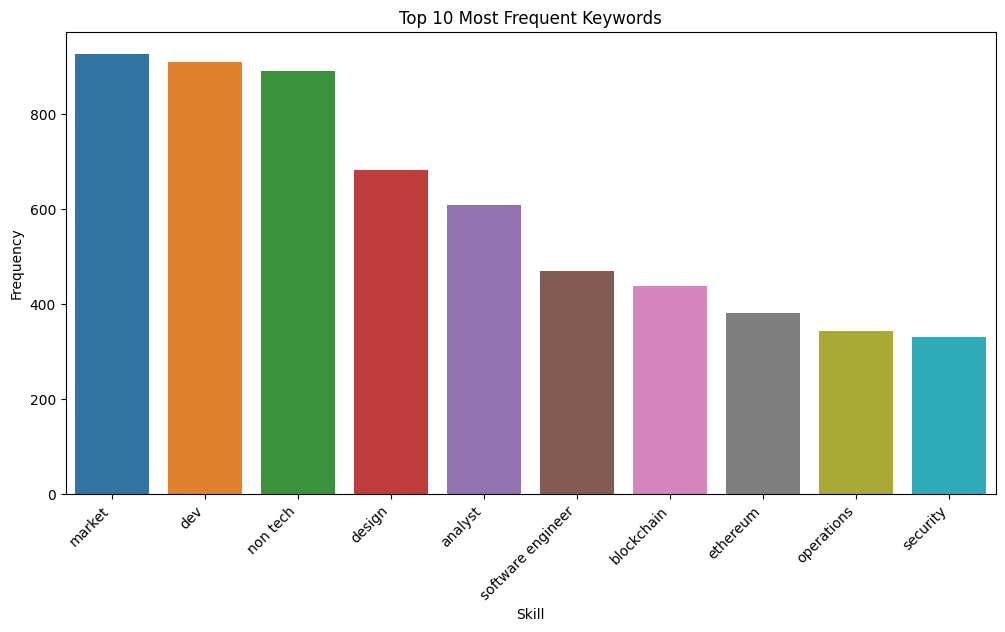

In [12]:
# Flatten the list of keywords for each job posting
flat_keywords = [keyword for sublist in combined_df['Combined Skills'] for keyword in sublist]
# Create a DataFrame to store the frequency of each keyword
keyword_frequency_df = pd.DataFrame(flat_keywords, columns=['Skill'])

# Corrected spelling for specific skills
keyword_frequency_df['Skill'] = keyword_frequency_df['Skill'].replace({
    'softwar engin': 'software engineer',
    'oper': 'operations',
    'secur': 'security'
})

keyword_frequency = keyword_frequency_df['Skill'].value_counts()

# Display the keyword frequency
print("Skill Frequency:")
print(keyword_frequency.head(10))  # Display the top 10 most frequent keywords

# Plot the top N most frequent keywords
top_n_keywords = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_frequency.head(top_n_keywords).index, y=keyword_frequency.head(top_n_keywords).values)
plt.title(f"Top {top_n_keywords} Most Frequent Keywords")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.1.2 Tags Skills Frequency
Dive into the frequency of skills specifically extracted from the 'Tags' column. Understand the most prevalent skills in job postings and visualize the top 10 most frequently mentioned skills.

Skill
ethereum    371
react       213
nft         213
java        205
rust        102
solidity    102
golang       92
node         91
defi         71
game         43
Name: count, dtype: int64


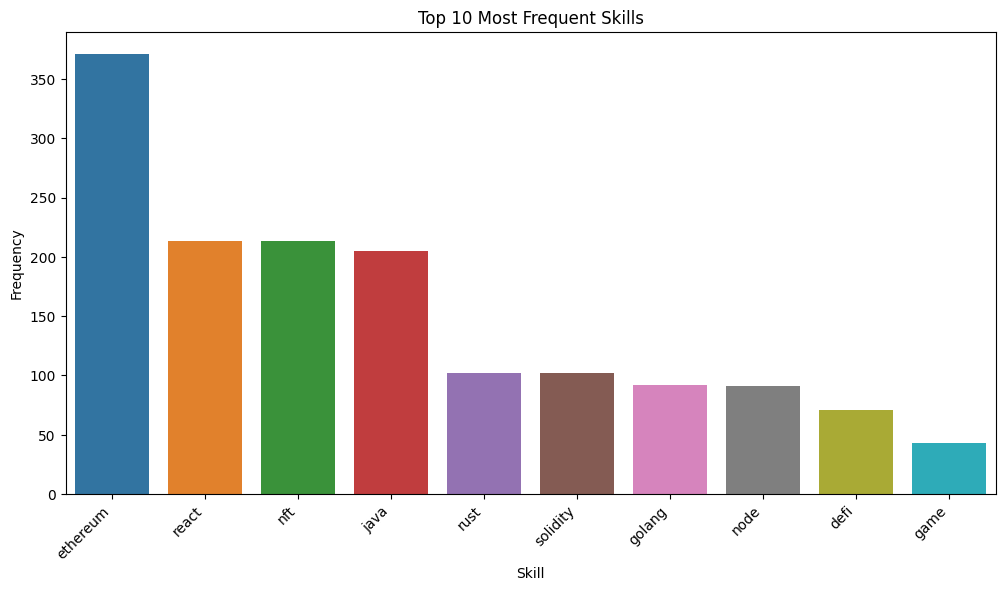

In [14]:
# Flatten the list of skills for each job posting
skip_skills = ['market', 'blockchain', 'dev', 'non tech', 'design', 'analyst', 'secur', 'oper','entri level','intern']# Add skills you want to skip
flat_skills = [skill.lower() if skill.lower() != 'solid' else 'solidity' for sublist in combined1_df['Tags Skills'] for skill in sublist if skill.lower() not in skip_skills]


# Create a DataFrame to store the frequency of each skill
skill_frequency_df = pd.DataFrame(flat_skills, columns=['Skill'])
skill_frequency = skill_frequency_df['Skill'].value_counts()

# Display the skill frequency
print(skill_frequency.head(10))  # Display the top 10 most frequent skills

# Plot the top N most frequent skills
top_n_skills = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_frequency.head(top_n_skills).index, y=skill_frequency.head(top_n_skills).values)
plt.title(f"Top {top_n_skills} Most Frequent Skills")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.1.3 Job Titles Frequency
Investigate the frequency of job titles extracted from the 'Job Title' column. Correct any spelling discrepancies and analyze the top 8 most frequently occurring job titles. Visualize these insights through a bar chart.

Job Frequency:
Job
software engineer    469
design               346
analyst              306
operations           176
security             161
intern                96
quality assurance     26
tech lead             17
Name: count, dtype: int64


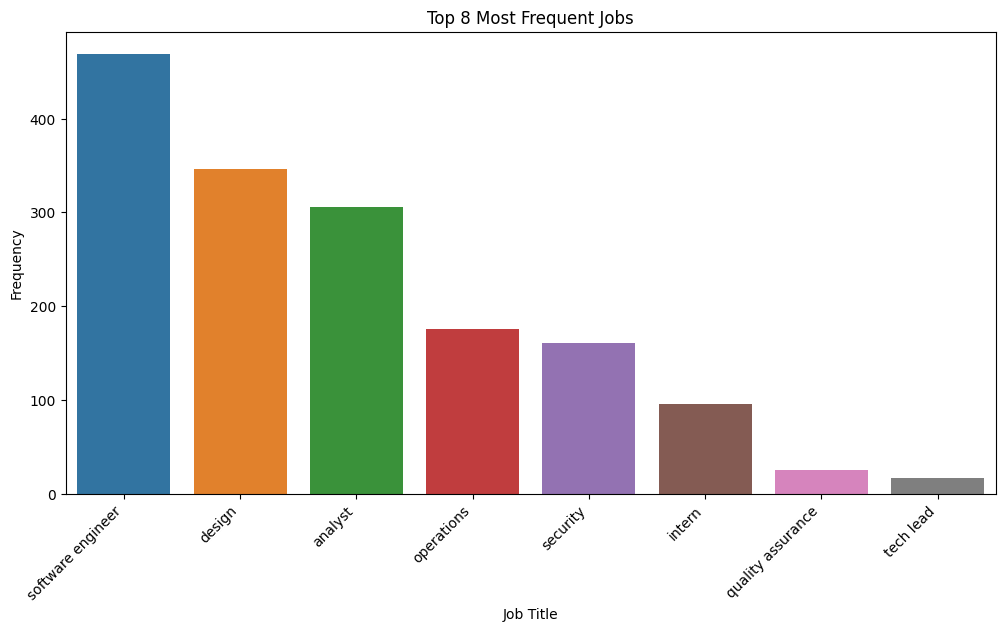

In [24]:
# Flatten the list of job_titles for each job posting
skip_job_titles = ['market', 'blockchain','nft','defi','game','java','react','solid','rust','golang','cryptocurr','ethereum','coindesk']# Add job_titles you want to skip
flat_job_titles = [job_title.lower() for sublist in combined1_df['Job Title Skills'] for job_title in sublist if job_title.lower() not in skip_job_titles]

# Create a DataFrame to store the frequency of each job_title
job_title_frequency_df = pd.DataFrame(flat_job_titles, columns=['Job'])

# Corrected spelling for specific job_titles
job_title_frequency_df['Job'] = job_title_frequency_df['Job'].replace({
    'softwar engin': 'software engineer',
    'oper': 'operations',
    'secur': 'security',
    'qualiti assur': 'quality assurance'
})

job_title_frequency = job_title_frequency_df['Job'].value_counts()

# Display the job_title frequency
print("Job Frequency:")
print(job_title_frequency.head(8))  # Display the top 10 most frequent job_titles

# Plot the top N most frequent job_titles
top_n_job_titles = 8
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_frequency.head(top_n_job_titles).index, y=job_title_frequency.head(top_n_job_titles).values)
plt.title(f"Top {top_n_job_titles} Most Frequent Jobs")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

## 4.2 Average Salary Analysis
### 4.2.1 Skills vs. Average Salary
Examine the relationship between skills and average salary. Analyze the top 10 skills associated with the highest average salaries, providing valuable insights for job seekers and employers. Visualize this data through a bar chart for enhanced understanding.

    Skill  Average Salary
0       c      128.714286
1     c++      128.714286
3    rust      125.372549
5    defi      122.864865
4   react      112.763441
8     nft      112.154930
7   web3j      112.125000
2    node      111.791209
12   java      109.117073
13   game      107.700000


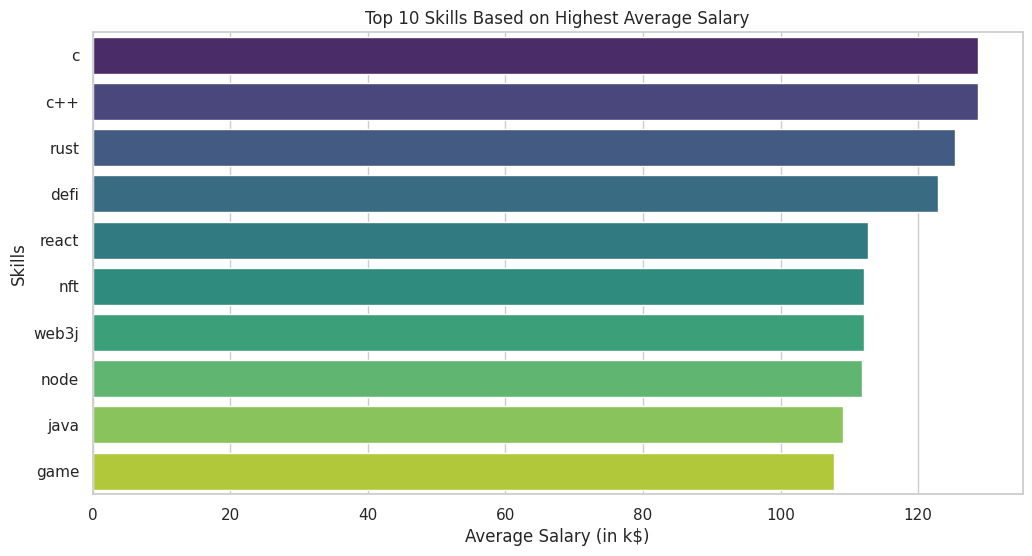

In [36]:
# Extract flat_skills from Combined Skills
skip_skills = ['market', 'blockchain', 'dev', 'non tech', 'design', 'analyst', 'secur', 'oper', 'entri level', 'intern','tech lead']
flat_skills = [skill.lower() if skill.lower() != 'solid' else 'solidity' for sublist in combined_df['Tags Skills'] for skill in sublist if skill.lower() not in skip_skills]

# Create a dictionary to store the total salary and count for each skill
skill_salary_count = {}

for index, row in combined_df.iterrows():
    for skill in flat_skills:
        if skill in row['Combined Skills']:
            if skill not in skill_salary_count:
                skill_salary_count[skill] = {'total_salary': 0, 'count': 0}
            skill_salary_count[skill]['total_salary'] += row['Salary Range']
            skill_salary_count[skill]['count'] += 1

# Calculate the average salary for each skill
average_salary_data = {'Skill': [], 'Average Salary': []}
for skill, values in skill_salary_count.items():
    average_salary = values['total_salary'] / values['count'] if values['count'] > 0 else 0
    average_salary_data['Skill'].append(skill)
    average_salary_data['Average Salary'].append(average_salary)

# Create a new DataFrame for average salaries
average_salary_df = pd.DataFrame(average_salary_data)
average_salary_df['Skill'] = average_salary_df['Skill'].replace({
    'c plu plu': 'c++',
})
top_10_skills = average_salary_df.nlargest(10, 'Average Salary')
# Print the result
print(top_10_skills)
# Set up the plotting style
sns.set(style="whitegrid")

# Create a bar plot for the top N skills with the highest average salary
top_n_skills = 10
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Average Salary', y='Skill', data=average_salary_df.nlargest(top_n_skills, 'Average Salary'), palette="viridis")

# Customize the plot
plt.title(f"Top {top_n_skills} Skills Based on Highest Average Salary")
plt.xlabel("Average Salary (in k$)")
plt.ylabel("Skills")
plt.show()

### 4.2.2 Job Titles vs. Average Salary
Explore the impact of job titles on average salary. Identify the top 10 job titles with the highest average salaries, providing valuable information for both job seekers and employers. Visualize these insights through a bar chart to enhance interpretability.

                      Skill  Average Salary
8                  security      153.295858
10                tech lead      121.526316
3                operations      120.396552
1                       dev      119.874720
0         software engineer      119.596983
9   market & communincation       97.000000
2                    design       95.670623
4         quality assurance       84.848485
5                   analyst       84.643564
6              data science       76.432432


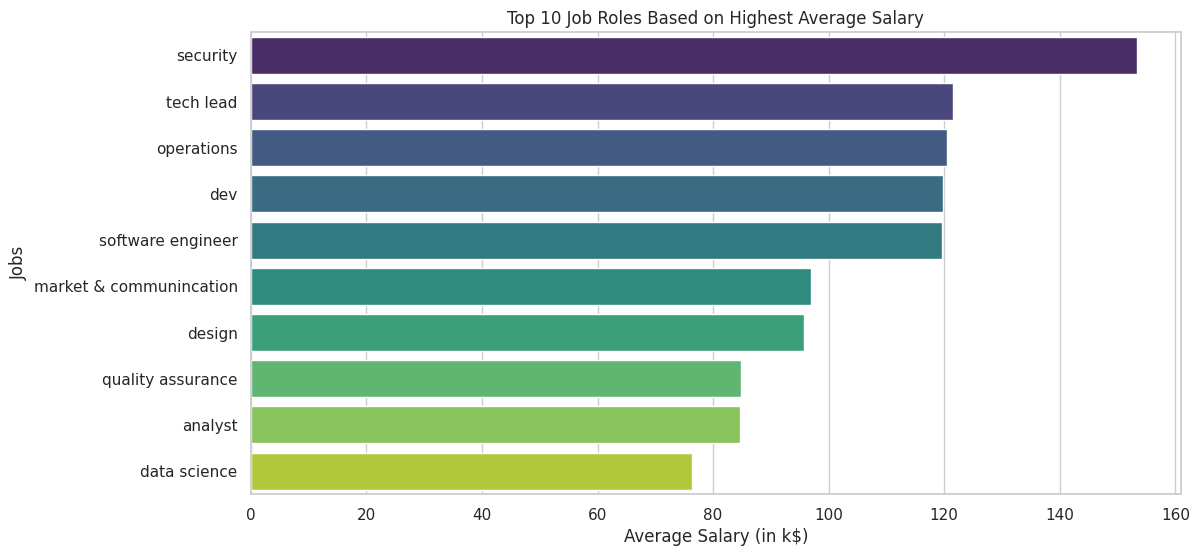

In [41]:
skip_skills = ['market', 'blockchain','nft','defi','game','java','react','solid','rust','golang','cryptocurr','ethereum','coindesk','c','node','rubi']# Add job_titles you want to skip
flat_skills = [job_title.lower() for sublist in combined1_df['Job Title Skills'] for job_title in sublist if job_title.lower() not in skip_skills]

# Create a dictionary to store the total salary and count for each skill
skill_salary_count = {}

for index, row in combined_df.iterrows():
    for skill in flat_skills:
        if skill in row['Combined Skills']:
            if skill not in skill_salary_count:
                skill_salary_count[skill] = {'total_salary': 0, 'count': 0}
            skill_salary_count[skill]['total_salary'] += row['Salary Range']
            skill_salary_count[skill]['count'] += 1

# Calculate the average salary for each skill
average_salary_data = {'Skill': [], 'Average Salary': []}
for skill, values in skill_salary_count.items():
    average_salary = values['total_salary'] / values['count'] if values['count'] > 0 else 0
    average_salary_data['Skill'].append(skill)
    average_salary_data['Average Salary'].append(average_salary)

# Create a new DataFrame for average salaries
average_salary_df = pd.DataFrame(average_salary_data)
average_salary_df['Skill'] = average_salary_df['Skill'].replace({
    'softwar engin': 'software engineer',
    'oper': 'operations',
    'secur': 'security',
    'qualiti assur': 'quality assurance',
    'market & commun':'market & communincation',
    'data scienc':'data science'
})
top_10_skills = average_salary_df.nlargest(10, 'Average Salary')
# Print the result
print(top_10_skills)
# Set up the plotting style
sns.set(style="whitegrid")

# Create a bar plot for the top N skills with the highest average salary
top_n_skills = 10
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Average Salary', y='Skill', data=average_salary_df.nlargest(top_n_skills, 'Average Salary'), palette="viridis")

# Customize the plot
plt.title(f"Top {top_n_skills} Job Roles Based on Highest Average Salary")
plt.xlabel("Average Salary (in k$)")
plt.ylabel("Jobs")
plt.show()

<font size=+2><b>5. Skill Visualization and Reporting</b></font>

## 5.1 Standardizing Skills and Word Cloud

- **Word Cloud Generation:**
  Visualize skill frequency through a word cloud, indicating demand for specific skills in the job market.


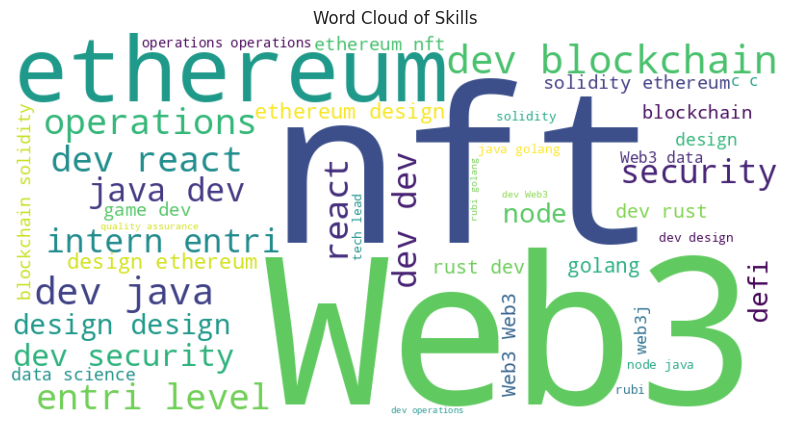

In [45]:
spelling_changes = {
    'softwar engin': 'software engineer',
    'oper': 'operations',
    'secur': 'security',
    'qualiti assur': 'quality assurance',
    'market & commun': 'market & communication',
    'data scienc': 'data science',
    'c plu plu': 'c++',
    'analyst':'Web3'
}

# Flatten the list of skills for each job posting
skip_skills = ['market', 'non tech']
flat_skills = [
    spelling_changes.get(skill.lower(), skill.lower())
    if skill.lower() != 'solid' else 'solidity'
    for sublist in combined_df['Tags Skills']
    for skill in sublist if skill.lower() not in skip_skills
]

# Create a string of skills for word cloud generation
skills_text = ' '.join(flat_skills)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills')
plt.show()

## 5.2 Analysis Summary and Recommendations

- **Overview:**
  Analyze job postings, emphasizing key columns ('Company Name,' 'Job Title,' 'Salary Range,' 'Tags,' and skills).

- **Skill Ranking:**
  Rank skills by frequency, highlighting top in-demand skills like Ethereum, React, NFT, Java, Rust, Solidity, Golang, Node.js, DeFi, and Game Development.

- **Highest Salary Skills:**
  Identify skills with the highest average salary and associated top job titles.

- **Word Cloud:**
  Visual representation of skill frequency, providing clear insights into in-demand skills.

- **Recommendations:**
  Guide job seekers to focus on key skills and advise employers on emphasizing specific skills in job descriptions.

- **Conclusion:**
  Summarize findings, emphasizing growing demand for skills like Ethereum, React, NFT, DeFi, and Rust. Stress the importance of continuous skill trend monitoring.

In [50]:
# Summarize your findings and generate a report
report = """
\033[1;31mBlockchain/Cryptocurrency Job Market Analysis Report\033[0m

\033[1;34m1. Overview:\033[0m
   - The analysis was conducted on a dataset of job postings in the blockchain/cryptocurrency field.
   - Key columns include '\033[1;36mCompany Name,\033[0m' '\033[1;36mJob Title,\033[0m' '\033[1;36mSalary Range,\033[0m' '\033[1;36mTags,\033[0m' and extracted skills.

\033[1;34m2. Skill Ranking:\033[0m
   - Extracted skills from job titles and tags were ranked based on frequency.
   - The top skills in demand include \033[1;32mEthereum, React, NFT, Java, Rust, Solidity, Golang, Node.js, DeFi, and Game Development.\033[0m

\033[1;34m3. Highest Salary Skills:\033[0m
   - Identified skills with the highest average salary.
   - Top Jobs associated with high salaries are \033[1;32mSecurity, Tech Lead, Operations, Dev, Software Engineer, Market & Communication, Design, Quality Assurance, Analyst, Data Science.\033[0m

\033[1;34m4. Word Cloud:\033[0m
   - Visual representation of skill frequency through a word cloud.
   - Larger words indicate more in-demand skills.

\033[1;34m5. Recommendations:\033[0m
   - For Job Seekers: Focus on acquiring skills like \033[1;32mEthereum, React, NFT, Java, Rust, Solidity, Golang, Node.js, DeFi, and Game Development\033[0m to enhance employability.
   - For Employers: Consider emphasizing \033[1;32mC, C++, Rust, DeFi, React, NFT, Web3j, Node.js, Java, and Game Development\033[0m in job descriptions to attract top talent.

\033[1;34m8. Conclusion:\033[0m
   - The blockchain/cryptocurrency job market exhibits a growing demand for skills such as \033[1;32mEthereum, React, NFT, Defi, Rust.\033[0m
   - Continuous monitoring of skill trends is crucial for both job seekers and employers.
"""

# Print or save the report
print(report)



Blockchain/Cryptocurrency Job Market Analysis Report

1. Overview:
   - The analysis was conducted on a dataset of job postings in the blockchain/cryptocurrency field.
   - Key columns include 'Company Name,' 'Job Title,' 'Salary Range,' 'Tags,' and extracted skills.

2. Skill Ranking:
   - Extracted skills from job titles and tags were ranked based on frequency.
   - The top skills in demand include Ethereum, React, NFT, Java, Rust, Solidity, Golang, Node.js, DeFi, and Game Development.

3. Highest Salary Skills:
   - Identified skills with the highest average salary.
   - Top Jobs associated with high salaries are Security, Tech Lead, Operations, Dev, Software Engineer, Market & Communication, Design, Quality Assurance, Analyst, Data Science.

4. Word Cloud:
   - Visual representation of skill frequency through a word cloud.
   - Larger words indicate more in-demand skills.

5. Recommendations:
   - For Job Seekers: Focus on acquiring skills like Ethereum, React, NFT, Java, Rust, So

<font size=+2><b>6. Conclusion and Future Insights</b></font>

### 6.1 Key Findings

- Dynamic skill landscape with Ethereum, React, NFT, Java, and Rust.
- Lucrative roles include Security, Tech Lead, Operations, and Software Engineer.
- Continuous skill trend monitoring is crucial.

### 6.2 Recommendations

- Job seekers focus on Ethereum, React, NFT, DeFi.
- Employers emphasize C++, Rust, DeFi, Web3j in job descriptions.

### 6.3 Future Implications

- Adaptive recruitment and continuous skill trend analysis are vital.

### 6.4 Conclusion

Valuable insights for informed decisions in the evolving blockchain job market.
